<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generative-Adverserial-Networks" data-toc-modified-id="Generative-Adverserial-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generative Adverserial Networks</a></span><ul class="toc-item"><li><span><a href="#Clonar-repo-en-colab" data-toc-modified-id="Clonar-repo-en-colab-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clonar repo en colab</a></span></li><li><span><a href="#Importar-librerias" data-toc-modified-id="Importar-librerias-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importar librerias</a></span></li></ul></li><li><span><a href="#Los-datos" data-toc-modified-id="Los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Los datos</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recordatorio:-Modelos-generativos-y-discrimnativos" data-toc-modified-id="Recordatorio:-Modelos-generativos-y-discrimnativos-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Recordatorio: Modelos generativos y discrimnativos</a></span></li></ul></li><li><span><a href="#Un-modelo-predictivo" data-toc-modified-id="Un-modelo-predictivo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Un modelo predictivo</a></span></li><li><span><a href="#El-espacio-geometrico-de-activaciones" data-toc-modified-id="El-espacio-geometrico-de-activaciones-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>El espacio geometrico de activaciones</a></span></li><li><span><a href="#Un-modelo-CNN" data-toc-modified-id="Un-modelo-CNN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Un modelo CNN</a></span></li><li><span><a href="#El-espacio-geometrico-de-activaciones" data-toc-modified-id="El-espacio-geometrico-de-activaciones-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>El espacio geometrico de activaciones</a></span></li></ul></li><li><span><a href="#Ahora-si-GANs" data-toc-modified-id="Ahora-si-GANs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ahora si GANs</a></span><ul class="toc-item"><li><span><a href="#data-loaders" data-toc-modified-id="data-loaders-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data loaders</a></span></li><li><span><a href="#Modelo-generador" data-toc-modified-id="Modelo-generador-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modelo generador</a></span></li><li><span><a href="#generar-muestras" data-toc-modified-id="generar-muestras-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>generar muestras</a></span></li><li><span><a href="#Modelo-discriminador" data-toc-modified-id="Modelo-discriminador-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Modelo discriminador</a></span></li><li><span><a href="#La-prueba-de-hierro" data-toc-modified-id="La-prueba-de-hierro-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>La prueba de hierro</a></span></li><li><span><a href="#Perdidas-para-el-juego-adversarial" data-toc-modified-id="Perdidas-para-el-juego-adversarial-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Perdidas para el juego adversarial</a></span></li><li><span><a href="#Optimizadores" data-toc-modified-id="Optimizadores-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Optimizadores</a></span></li><li><span><a href="#Condiciones-iniciales" data-toc-modified-id="Condiciones-iniciales-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Condiciones iniciales</a></span></li><li><span><a href="#Una-epoca-de-entrenamiento" data-toc-modified-id="Una-epoca-de-entrenamiento-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Una epoca de entrenamiento</a></span><ul class="toc-item"><li><span><a href="#Dibuja-imagenes" data-toc-modified-id="Dibuja-imagenes-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Dibuja imagenes</a></span></li></ul></li><li><span><a href="#Loop-de-entrenamiento" data-toc-modified-id="Loop-de-entrenamiento-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Loop de entrenamiento</a></span></li></ul></li></ul></div>

# Generative Adverserial Networks

Ejecutar este notebook via colab:
<a href="https://colab.research.google.com/github/GenerativeModels_19/blob/master/notebooks/2_GAN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clonar repo en colab

In [1]:
import os
import subprocess
import sys

GIT_NAME='GenerativeModels_19'
GIT_URL='https://riiaa@github.com/riiaa/{}.git'.format(GIT_NAME)
IN_COLAB = 'google.colab' in sys.modules

def run_cmd(cmd):
    print('Output of "{}":'.format(cmd))
    print(subprocess.run(cmd,stdout=subprocess.PIPE, shell=True).stdout.decode('utf-8'))
        
if IN_COLAB:
    SRC_DIR='.'
    run_cmd('rm -rf sample_data')
    run_cmd('rm -rf {}'.format(GIT_NAME))
    run_cmd('git clone --verbose --progress {}'.format(GIT_URL))
    run_cmd('mv {}/* . '.format(GIT_NAME))
    run_cmd('rm -rf {}'.format(GIT_NAME))
    run_cmd('pip install --upgrade --force-reinstall tf-nightly-gpu-2.0-preview')
else:
    SRC_DIR='..'
    
print('Using colab? {}, using root directory "{}"'.format(IN_COLAB,SRC_DIR))

Using colab? False, using root directory ".."


## Importar librerias


In [2]:
import os
import sys
from tqdm.autonotebook import tqdm
# scientific python stack
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML/DL
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tkl
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(tfk.__version__))

/home/beangoben/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Tensorflow:2.0.0-dev20190708
Keras:2.2.4-tf


# Los datos
La tarea que vamos a realizar es la clasificación de ropa usando la base de datos [Fashion MNIST](https://arxiv.org/abs/1708.07747), la cual consiste de 60,000 imágenes de entrenamiento y 10,000 de prueba asociadas a 10 categorías de ropa.

| **Etiqueta**| **Categoría** |
| ------------- |:-------------:| 
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Angle boot|

Todas las imágenes son de $28 \times 28$ pixeles en escala de grises. Algunos ejemplos se muestran a continuación:

![Fashion MNIST](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [3]:
etiquetas = ["T-shirt/top",
             "Trouser",    
             "Pullover",   
             "Dress",      
             "Coat",       
             "Sandal",      
             "Shirt",       
             "Sneaker",     
             "Bag",         
             "Ankle boot"]

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255.0 * - 0.5
x_test = x_test/255.0 * - 0.5
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


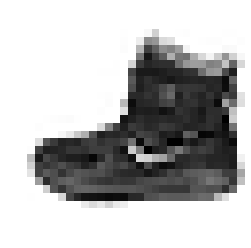

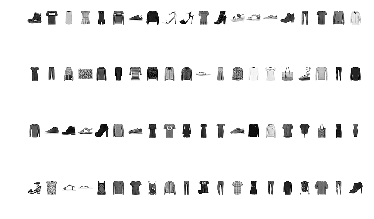

In [4]:
def plot_img(img):
    plt.imshow(img[:,:,0]* 127.5 + 127.5, cmap='Greys_r')
    plt.axis('off')
    plt.show()
def plot_imglist(imglist):
    n=imglist.shape[0]
    for i in range(n):
        plt.subplot(4,max(4,n/4), i+1)
        plt.imshow(imglist[i,:,:,0]* 127.5 + 127.5, cmap='Greys_r')
        plt.axis('off')
    plt.show()

    
plot_img(x_train[0])
plot_imglist(x_train[:80])


### Recordatorio: Modelos generativos y discrimnativos

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/generative_descriminative.png?raw=true)


## Un modelo predictivo

In [5]:
model = tfk.Sequential([
    tkl.Flatten(input_shape=(28, 28,1)),
    tkl.Dense(128, activation='relu'),
    tkl.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


W0830 07:02:16.071024 140169985095488 deprecation.py:323] From /home/beangoben/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1251: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0830 07:02:16.121078 140169985095488 deprecation.py:323] From /home/beangoben/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5163 - accuracy: 0.8211
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3855 - accuracy: 0.8618
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3452 - accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3197 - accuracy: 0.8832
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3031 - accuracy: 0.8880
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2862 - accuracy: 0.8948
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2753 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2634 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2531 - accuracy: 0.9067
Epoch 10/10
60

## El espacio geometrico de activaciones

In [6]:
emb_model = tfk.Model(inputs=model.inputs, outputs=model.layers[-2].output)
emb = emb_model.predict(x_test)
print(emb.shape)

(10000, 128)


## Un modelo CNN

In [8]:
model = tfk.Sequential()
model.add(tkl.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                 input_shape=[28, 28, 1]))
model.add(tkl.LeakyReLU())
model.add(tkl.Dropout(0.3))
model.add(tkl.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
model.add(tkl.LeakyReLU())
model.add(tkl.Dropout(0.3))
model.add(tkl.Flatten())
model.add(tkl.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

## El espacio geometrico de activaciones

In [9]:
emb_model = tfk.Model(inputs=model.inputs, outputs=model.layers[-2].output)
emb = emb_model.predict(x_test)
print(emb.shape)

(10000, 6272)


# Ahora si GANs

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia3/gan.png?raw=true)


## data loaders

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train = (x_train - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Modelo generador

In [11]:
def make_generator_model():
    model = tfk.Sequential()
    model.add(tkl.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())

    model.add(tkl.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(tkl.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())

    model.add(tkl.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())

    model.add(tkl.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

## generar muestras

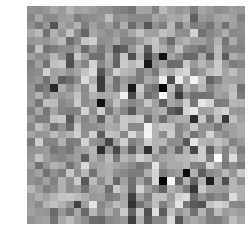

In [17]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
gen_img = generator(noise, training=False)

plot_img(gen_img[0, :, :])

## Modelo discriminador

In [18]:
def make_discriminator_model():
    model = tfk.Sequential()
    model.add(tkl.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(0.3))

    model.add(tkl.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(0.3))

    model.add(tkl.Flatten())
    model.add(tkl.Dense(1))

    return model

## La prueba de hierro

In [19]:
discriminator = make_discriminator_model()
decision = discriminator(gen_img)
print (decision)

tf.Tensor([[0.00013299]], shape=(1, 1), dtype=float32)


## Perdidas para el juego adversarial

In [20]:
cross_entropy = tfk.losses.BinaryCrossentropy(from_logits=True)

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [22]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

## Optimizadores

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## Condiciones iniciales

In [24]:
EPOCHS = 50
noise_dim = 100
num_examples = 16


seed = tf.random.normal([num_examples, noise_dim])

## Una epoca de entrenamiento

In [25]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

### Dibuja imagenes

In [26]:
def generate_and_save_images(model, epoch, test_input):

    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    #plt.savefig('epoch_{:04d}.png'.format(epoch))
    plt.show()

## Loop de entrenamiento

In [33]:
import IPython.display 
def train(dataset, epochs):
    for epoch in tqdm(range(epochs)):

        for image_batch in dataset:
            train_step(image_batch)

        # Generar imagenes cada epoca
        IPython.display.clear_output(wait=True)
        generate_and_save_images(generator,epoch + 1,seed)

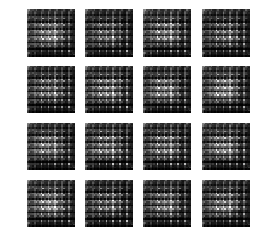

In [34]:
train(train_dataset, 1)